In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
num_classes = 10
batch_size = 100
epochs = 10
stats = []

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

('x_train shape:', (60000, 28, 28, 1))
(60000, 'train samples')
(10000, 'test samples')


In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [7]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.001))

In [8]:
for n in range(epochs):
    for i in range(0, x_train.shape[0], batch_size):
        x_batch = x_train[i:(i + batch_size)]
        y_batch = y_train[i:(i + batch_size)]

        # predict class probabilities
        y_pred = model.predict(x_batch)

        # sample from those probabilities
        y_sample = np.empty((batch_size,), dtype=np.integer)
        for j, p in enumerate(y_pred):
            y_sample[j] = np.random.choice(num_classes, p=p)

        # calculate accuracy for logging
        y_pred = np.argmax(y_pred, axis=1)
        accuracy = np.mean(y_pred == y_batch)

        # calculate reward and advantage, update baseline
        reward = (y_sample == y_batch)
        baseline = accuracy
        advantage = reward - baseline

        # train with samples as targets and advantage as sample weight
        loss = model.train_on_batch(x_batch, y_sample, sample_weight = advantage)

        # log statistics
        stats.append((loss, accuracy, baseline))
        print(i, loss, accuracy, baseline)

(0, -0.022490425, 0.059999999999999998, 0.059999999999999998)
(100, -0.3489157, 0.20999999999999999, 0.20999999999999999)
(200, -0.30747786, 0.20000000000000001, 0.20000000000000001)
(300, -0.30293864, 0.19, 0.19)
(400, -0.030911567, 0.10000000000000001, 0.10000000000000001)
(500, -0.033998743, 0.12, 0.12)
(600, 0.0880991, 0.12, 0.12)
(700, 0.034214333, 0.050000000000000003, 0.050000000000000003)
(800, 0.017485073, 0.13, 0.13)
(900, 0.023863304, 0.080000000000000002, 0.080000000000000002)
(1000, -0.11219004, 0.17000000000000001, 0.17000000000000001)
(1100, -0.16032772, 0.22, 0.22)
(1200, -0.12322877, 0.19, 0.19)
(1300, -0.17314318, 0.20999999999999999, 0.20999999999999999)
(1400, -0.27916119, 0.20999999999999999, 0.20999999999999999)
(1500, -0.25786975, 0.28000000000000003, 0.28000000000000003)
(1600, -0.43766508, 0.37, 0.37)
(1700, -0.30241019, 0.34000000000000002, 0.34000000000000002)
(1800, -0.355196, 0.35999999999999999, 0.35999999999999999)
(1900, -0.44408229, 0.39000000000000001,

(15400, -1.1764522, 0.52000000000000002, 0.52000000000000002)
(15500, -1.2726754, 0.40999999999999998, 0.40999999999999998)
(15600, -1.7753725, 0.54000000000000004, 0.54000000000000004)
(15700, -0.8570891, 0.40000000000000002, 0.40000000000000002)
(15800, -1.1623454, 0.44, 0.44)
(15900, -1.3490474, 0.40999999999999998, 0.40999999999999998)
(16000, -0.87721801, 0.56000000000000005, 0.56000000000000005)
(16100, -1.1826051, 0.46000000000000002, 0.46000000000000002)
(16200, -1.4212391, 0.44, 0.44)
(16300, -1.301738, 0.48999999999999999, 0.48999999999999999)
(16400, -1.0339899, 0.53000000000000003, 0.53000000000000003)
(16500, -1.89986, 0.56999999999999995, 0.56999999999999995)
(16600, -1.3142208, 0.52000000000000002, 0.52000000000000002)
(16700, -0.88117415, 0.57999999999999996, 0.57999999999999996)
(16800, -1.655003, 0.60999999999999999, 0.60999999999999999)
(16900, -1.3901322, 0.45000000000000001, 0.45000000000000001)
(17000, -1.198557, 0.54000000000000004, 0.54000000000000004)
(17100, -

(29600, -0.87654853, 0.65000000000000002, 0.65000000000000002)
(29700, -1.2970052, 0.64000000000000001, 0.64000000000000001)
(29800, -0.96663529, 0.58999999999999997, 0.58999999999999997)
(29900, -1.5284035, 0.48999999999999999, 0.48999999999999999)
(30000, -1.4337935, 0.60999999999999999, 0.60999999999999999)
(30100, -0.99302733, 0.5, 0.5)
(30200, -1.9143666, 0.57999999999999996, 0.57999999999999996)
(30300, -1.6621495, 0.51000000000000001, 0.51000000000000001)
(30400, -0.97937363, 0.54000000000000004, 0.54000000000000004)
(30500, -1.5580816, 0.59999999999999998, 0.59999999999999998)
(30600, -1.8465381, 0.52000000000000002, 0.52000000000000002)
(30700, -1.6994078, 0.60999999999999999, 0.60999999999999999)
(30800, -1.6486107, 0.62, 0.62)
(30900, -1.4492625, 0.53000000000000003, 0.53000000000000003)
(31000, -1.2216766, 0.56000000000000005, 0.56000000000000005)
(31100, -1.8141887, 0.5, 0.5)
(31200, -1.0229764, 0.55000000000000004, 0.55000000000000004)
(31300, -1.0388571, 0.48999999999999

(44200, -1.7807014, 0.59999999999999998, 0.59999999999999998)
(44300, -1.4226385, 0.62, 0.62)
(44400, -1.7236152, 0.66000000000000003, 0.66000000000000003)
(44500, -2.2686348, 0.57999999999999996, 0.57999999999999996)
(44600, -1.4558711, 0.58999999999999997, 0.58999999999999997)
(44700, -1.8485798, 0.60999999999999999, 0.60999999999999999)
(44800, -0.96220869, 0.54000000000000004, 0.54000000000000004)
(44900, -1.3113606, 0.63, 0.63)
(45000, -1.425047, 0.53000000000000003, 0.53000000000000003)
(45100, -1.6166402, 0.57999999999999996, 0.57999999999999996)
(45200, -1.3668045, 0.68000000000000005, 0.68000000000000005)
(45300, -1.3861219, 0.68000000000000005, 0.68000000000000005)
(45400, -2.1269083, 0.57999999999999996, 0.57999999999999996)
(45500, -1.7029675, 0.53000000000000003, 0.53000000000000003)
(45600, -1.4820954, 0.62, 0.62)
(45700, -2.2711191, 0.68000000000000005, 0.68000000000000005)
(45800, -1.1166854, 0.60999999999999999, 0.60999999999999999)
(45900, -1.4488186, 0.59999999999999

(58800, -2.1077533, 0.69999999999999996, 0.69999999999999996)
(58900, -2.3061209, 0.67000000000000004, 0.67000000000000004)
(59000, -1.507154, 0.71999999999999997, 0.71999999999999997)
(59100, -1.4855316, 0.76000000000000001, 0.76000000000000001)
(59200, -1.3041351, 0.71999999999999997, 0.71999999999999997)
(59300, -1.1136925, 0.68999999999999995, 0.68999999999999995)
(59400, -1.4468175, 0.70999999999999996, 0.70999999999999996)
(59500, -1.3999552, 0.70999999999999996, 0.70999999999999996)
(59600, -1.7058625, 0.72999999999999998, 0.72999999999999998)
(59700, -1.6944497, 0.59999999999999998, 0.59999999999999998)
(59800, -1.8194488, 0.73999999999999999, 0.73999999999999999)
(59900, -1.1901413, 0.76000000000000001, 0.76000000000000001)
(0, -1.5988045, 0.65000000000000002, 0.65000000000000002)
(100, -1.4415299, 0.68999999999999995, 0.68999999999999995)
(200, -1.2083158, 0.64000000000000001, 0.64000000000000001)
(300, -1.5235846, 0.71999999999999997, 0.71999999999999997)
(400, -1.8403951, 0

(12900, -1.3998326, 0.69999999999999996, 0.69999999999999996)
(13000, -0.79987198, 0.75, 0.75)
(13100, -1.4911635, 0.64000000000000001, 0.64000000000000001)
(13200, -1.0946654, 0.78000000000000003, 0.78000000000000003)
(13300, -1.7199768, 0.71999999999999997, 0.71999999999999997)
(13400, -1.2850935, 0.81000000000000005, 0.81000000000000005)
(13500, -2.4571562, 0.69999999999999996, 0.69999999999999996)
(13600, -1.8699149, 0.68000000000000005, 0.68000000000000005)
(13700, -2.4103212, 0.70999999999999996, 0.70999999999999996)
(13800, -1.7386501, 0.73999999999999999, 0.73999999999999999)
(13900, -0.96926045, 0.72999999999999998, 0.72999999999999998)
(14000, -2.4081225, 0.68000000000000005, 0.68000000000000005)
(14100, -0.91312063, 0.72999999999999998, 0.72999999999999998)
(14200, -1.3893846, 0.67000000000000004, 0.67000000000000004)
(14300, -2.0309477, 0.63, 0.63)
(14400, -1.7774806, 0.76000000000000001, 0.76000000000000001)
(14500, -2.3088999, 0.65000000000000002, 0.65000000000000002)
(14

(26600, -1.8275604, 0.75, 0.75)
(26700, -1.8756076, 0.68999999999999995, 0.68999999999999995)
(26800, -1.784256, 0.78000000000000003, 0.78000000000000003)
(26900, -2.300365, 0.73999999999999999, 0.73999999999999999)
(27000, -1.5816019, 0.75, 0.75)
(27100, -1.0160537, 0.76000000000000001, 0.76000000000000001)
(27200, -1.4389812, 0.75, 0.75)
(27300, -1.3434144, 0.81000000000000005, 0.81000000000000005)
(27400, -1.206754, 0.81999999999999995, 0.81999999999999995)
(27500, -2.4870582, 0.65000000000000002, 0.65000000000000002)
(27600, -1.4474112, 0.75, 0.75)
(27700, -1.8992615, 0.73999999999999999, 0.73999999999999999)
(27800, -1.5786508, 0.70999999999999996, 0.70999999999999996)
(27900, -2.0371821, 0.75, 0.75)
(28000, -2.181041, 0.72999999999999998, 0.72999999999999998)
(28100, -1.5844061, 0.73999999999999999, 0.73999999999999999)
(28200, -1.7733847, 0.70999999999999996, 0.70999999999999996)
(28300, -1.4293008, 0.75, 0.75)
(28400, -1.7717911, 0.81999999999999995, 0.81999999999999995)
(28500

(40900, -0.66051483, 0.92000000000000004, 0.92000000000000004)
(41000, -0.94256598, 0.83999999999999997, 0.83999999999999997)
(41100, -1.1543547, 0.78000000000000003, 0.78000000000000003)
(41200, -2.2766359, 0.73999999999999999, 0.73999999999999999)
(41300, -1.5082608, 0.80000000000000004, 0.80000000000000004)
(41400, -0.9716965, 0.79000000000000004, 0.79000000000000004)
(41500, -1.9669064, 0.73999999999999999, 0.73999999999999999)
(41600, -2.1143806, 0.76000000000000001, 0.76000000000000001)
(41700, -1.149298, 0.81999999999999995, 0.81999999999999995)
(41800, -1.0885687, 0.84999999999999998, 0.84999999999999998)
(41900, -1.4198612, 0.82999999999999996, 0.82999999999999996)
(42000, -1.1604654, 0.75, 0.75)
(42100, -1.9959227, 0.71999999999999997, 0.71999999999999997)
(42200, -1.128547, 0.80000000000000004, 0.80000000000000004)
(42300, -1.1586144, 0.85999999999999999, 0.85999999999999999)
(42400, -1.3365571, 0.81999999999999995, 0.81999999999999995)
(42500, -0.96808565, 0.800000000000000

(55300, -1.0956932, 0.87, 0.87)
(55400, -1.7550015, 0.78000000000000003, 0.78000000000000003)
(55500, -1.0260526, 0.88, 0.88)
(55600, -1.2357727, 0.83999999999999997, 0.83999999999999997)
(55700, -1.1465513, 0.83999999999999997, 0.83999999999999997)
(55800, -1.5042497, 0.80000000000000004, 0.80000000000000004)
(55900, -0.80685925, 0.92000000000000004, 0.92000000000000004)
(56000, -1.0960988, 0.79000000000000004, 0.79000000000000004)
(56100, -0.78300881, 0.83999999999999997, 0.83999999999999997)
(56200, -0.92406768, 0.81999999999999995, 0.81999999999999995)
(56300, -1.1702503, 0.83999999999999997, 0.83999999999999997)
(56400, -0.84149301, 0.80000000000000004, 0.80000000000000004)
(56500, -1.4638896, 0.81000000000000005, 0.81000000000000005)
(56600, -1.7747412, 0.81000000000000005, 0.81000000000000005)
(56700, -1.2359127, 0.87, 0.87)
(56800, -1.5368649, 0.78000000000000003, 0.78000000000000003)
(56900, -1.0052004, 0.89000000000000001, 0.89000000000000001)
(57000, -1.2444644, 0.8299999999

(10800, -0.96264404, 0.89000000000000001, 0.89000000000000001)
(10900, -1.1229622, 0.85999999999999999, 0.85999999999999999)
(11000, -1.0774882, 0.83999999999999997, 0.83999999999999997)
(11100, -1.7935148, 0.84999999999999998, 0.84999999999999998)
(11200, -1.6081852, 0.83999999999999997, 0.83999999999999997)
(11300, -0.89969063, 0.89000000000000001, 0.89000000000000001)
(11400, -1.297392, 0.87, 0.87)
(11500, -1.5985991, 0.78000000000000003, 0.78000000000000003)
(11600, -1.2563546, 0.81999999999999995, 0.81999999999999995)
(11700, -1.3894194, 0.72999999999999998, 0.72999999999999998)
(11800, -1.5652193, 0.81999999999999995, 0.81999999999999995)
(11900, -0.69872874, 0.88, 0.88)
(12000, -0.85351366, 0.84999999999999998, 0.84999999999999998)
(12100, -1.2487661, 0.84999999999999998, 0.84999999999999998)
(12200, -1.4006189, 0.83999999999999997, 0.83999999999999997)
(12300, -1.6048214, 0.87, 0.87)
(12400, -1.2155439, 0.81999999999999995, 0.81999999999999995)
(12500, -0.85883403, 0.8399999999

(25400, -0.62969267, 0.87, 0.87)
(25500, -1.3365347, 0.83999999999999997, 0.83999999999999997)
(25600, -0.63315046, 0.88, 0.88)
(25700, -0.89545435, 0.87, 0.87)
(25800, -1.5875351, 0.80000000000000004, 0.80000000000000004)
(25900, -0.72823495, 0.83999999999999997, 0.83999999999999997)
(26000, -1.709628, 0.76000000000000001, 0.76000000000000001)
(26100, -0.75450921, 0.90000000000000002, 0.90000000000000002)
(26200, -1.2477479, 0.84999999999999998, 0.84999999999999998)
(26300, -0.77634507, 0.85999999999999999, 0.85999999999999999)
(26400, -1.0214381, 0.85999999999999999, 0.85999999999999999)
(26500, -1.140783, 0.84999999999999998, 0.84999999999999998)
(26600, -0.99207705, 0.85999999999999999, 0.85999999999999999)
(26700, -1.3657149, 0.84999999999999998, 0.84999999999999998)
(26800, -1.2642058, 0.84999999999999998, 0.84999999999999998)
(26900, -0.8558026, 0.89000000000000001, 0.89000000000000001)
(27000, -0.87640035, 0.88, 0.88)
(27100, -1.2984631, 0.79000000000000004, 0.79000000000000004

(40300, -0.89973778, 0.87, 0.87)
(40400, -1.276543, 0.85999999999999999, 0.85999999999999999)
(40500, -1.4436475, 0.85999999999999999, 0.85999999999999999)
(40600, -0.88794464, 0.87, 0.87)
(40700, -1.4256587, 0.81000000000000005, 0.81000000000000005)
(40800, -0.5850696, 0.88, 0.88)
(40900, -1.0224637, 0.90000000000000002, 0.90000000000000002)
(41000, -1.4885306, 0.82999999999999996, 0.82999999999999996)
(41100, -1.1969761, 0.84999999999999998, 0.84999999999999998)
(41200, -1.5690904, 0.83999999999999997, 0.83999999999999997)
(41300, -1.617061, 0.81999999999999995, 0.81999999999999995)
(41400, -0.95967066, 0.87, 0.87)
(41500, -1.3987095, 0.81999999999999995, 0.81999999999999995)
(41600, -1.1462069, 0.85999999999999999, 0.85999999999999999)
(41700, -0.9465335, 0.91000000000000003, 0.91000000000000003)
(41800, -1.0320325, 0.89000000000000001, 0.89000000000000001)
(41900, -0.80114806, 0.89000000000000001, 0.89000000000000001)
(42000, -1.4055446, 0.80000000000000004, 0.80000000000000004)
(4

(55100, -1.4773921, 0.84999999999999998, 0.84999999999999998)
(55200, -0.81560248, 0.88, 0.88)
(55300, -0.96707213, 0.89000000000000001, 0.89000000000000001)
(55400, -1.9995759, 0.79000000000000004, 0.79000000000000004)
(55500, -0.91114509, 0.85999999999999999, 0.85999999999999999)
(55600, -0.83786482, 0.89000000000000001, 0.89000000000000001)
(55700, -1.4802758, 0.85999999999999999, 0.85999999999999999)
(55800, -1.5115756, 0.81000000000000005, 0.81000000000000005)
(55900, -0.7377581, 0.92000000000000004, 0.92000000000000004)
(56000, -1.6331412, 0.81000000000000005, 0.81000000000000005)
(56100, -1.391559, 0.89000000000000001, 0.89000000000000001)
(56200, -1.56172, 0.81000000000000005, 0.81000000000000005)
(56300, -1.6724679, 0.84999999999999998, 0.84999999999999998)
(56400, -1.329453, 0.81999999999999995, 0.81999999999999995)
(56500, -1.5275235, 0.82999999999999996, 0.82999999999999996)
(56600, -1.6879196, 0.80000000000000004, 0.80000000000000004)
(56700, -0.84308451, 0.88, 0.88)
(5680

(11100, -1.6209291, 0.84999999999999998, 0.84999999999999998)
(11200, -0.62628049, 0.84999999999999998, 0.84999999999999998)
(11300, -1.2731153, 0.89000000000000001, 0.89000000000000001)
(11400, -1.1873505, 0.87, 0.87)
(11500, -1.724649, 0.78000000000000003, 0.78000000000000003)
(11600, -1.7365073, 0.82999999999999996, 0.82999999999999996)
(11700, -2.0778837, 0.77000000000000002, 0.77000000000000002)
(11800, -1.0516503, 0.83999999999999997, 0.83999999999999997)
(11900, -0.86307073, 0.89000000000000001, 0.89000000000000001)
(12000, -0.81387985, 0.88, 0.88)
(12100, -1.2481674, 0.84999999999999998, 0.84999999999999998)
(12200, -1.0444058, 0.84999999999999998, 0.84999999999999998)
(12300, -1.1865432, 0.84999999999999998, 0.84999999999999998)
(12400, -1.5383228, 0.82999999999999996, 0.82999999999999996)
(12500, -0.92914462, 0.82999999999999996, 0.82999999999999996)
(12600, -1.5162652, 0.81000000000000005, 0.81000000000000005)
(12700, -1.4809819, 0.82999999999999996, 0.82999999999999996)
(12

(26000, -2.1113765, 0.78000000000000003, 0.78000000000000003)
(26100, -0.52127463, 0.90000000000000002, 0.90000000000000002)
(26200, -1.4948888, 0.85999999999999999, 0.85999999999999999)
(26300, -0.7220124, 0.85999999999999999, 0.85999999999999999)
(26400, -1.0842007, 0.85999999999999999, 0.85999999999999999)
(26500, -1.3125663, 0.87, 0.87)
(26600, -1.1914339, 0.87, 0.87)
(26700, -0.89954191, 0.82999999999999996, 0.82999999999999996)
(26800, -1.2384069, 0.84999999999999998, 0.84999999999999998)
(26900, -0.65714419, 0.88, 0.88)
(27000, -0.82778096, 0.85999999999999999, 0.85999999999999999)
(27100, -1.1038049, 0.81000000000000005, 0.81000000000000005)
(27200, -0.92433757, 0.88, 0.88)
(27300, -1.1154863, 0.88, 0.88)
(27400, -1.2581018, 0.89000000000000001, 0.89000000000000001)
(27500, -1.2708218, 0.81000000000000005, 0.81000000000000005)
(27600, -1.5228866, 0.84999999999999998, 0.84999999999999998)
(27700, -1.2553489, 0.81999999999999995, 0.81999999999999995)
(27800, -1.2140238, 0.8399999

(41000, -1.4089303, 0.85999999999999999, 0.85999999999999999)
(41100, -1.3757358, 0.84999999999999998, 0.84999999999999998)
(41200, -1.1537635, 0.82999999999999996, 0.82999999999999996)
(41300, -1.0163478, 0.82999999999999996, 0.82999999999999996)
(41400, -1.0205742, 0.87, 0.87)
(41500, -0.98517573, 0.84999999999999998, 0.84999999999999998)
(41600, -1.7872723, 0.82999999999999996, 0.82999999999999996)
(41700, -1.1453744, 0.89000000000000001, 0.89000000000000001)
(41800, -0.95467156, 0.90000000000000002, 0.90000000000000002)
(41900, -0.96034169, 0.89000000000000001, 0.89000000000000001)
(42000, -1.5486281, 0.81999999999999995, 0.81999999999999995)
(42100, -1.3238987, 0.81999999999999995, 0.81999999999999995)
(42200, -1.1210959, 0.84999999999999998, 0.84999999999999998)
(42300, -0.6822561, 0.91000000000000003, 0.91000000000000003)
(42400, -1.2410316, 0.80000000000000004, 0.80000000000000004)
(42500, -1.3155855, 0.82999999999999996, 0.82999999999999996)
(42600, -1.0595508, 0.8399999999999

(55900, -0.60577631, 0.92000000000000004, 0.92000000000000004)
(56000, -1.6986769, 0.81999999999999995, 0.81999999999999995)
(56100, -1.1848192, 0.87, 0.87)
(56200, -1.0276963, 0.84999999999999998, 0.84999999999999998)
(56300, -1.0692339, 0.85999999999999999, 0.85999999999999999)
(56400, -1.3121791, 0.81999999999999995, 0.81999999999999995)
(56500, -1.5934128, 0.82999999999999996, 0.82999999999999996)
(56600, -1.9323784, 0.80000000000000004, 0.80000000000000004)
(56700, -0.79128808, 0.87, 0.87)
(56800, -1.9139251, 0.79000000000000004, 0.79000000000000004)
(56900, -1.1824985, 0.90000000000000002, 0.90000000000000002)
(57000, -1.6746732, 0.83999999999999997, 0.83999999999999997)
(57100, -1.2793684, 0.88, 0.88)
(57200, -0.97052413, 0.88, 0.88)
(57300, -1.2644094, 0.82999999999999996, 0.82999999999999996)
(57400, -0.66378343, 0.89000000000000001, 0.89000000000000001)
(57500, -1.849555, 0.77000000000000002, 0.77000000000000002)
(57600, -1.7123226, 0.84999999999999998, 0.84999999999999998)
(

(12200, -0.9843055, 0.84999999999999998, 0.84999999999999998)
(12300, -1.1456218, 0.89000000000000001, 0.89000000000000001)
(12400, -0.99495816, 0.82999999999999996, 0.82999999999999996)
(12500, -1.1545066, 0.84999999999999998, 0.84999999999999998)
(12600, -0.55614358, 0.83999999999999997, 0.83999999999999997)
(12700, -1.0905976, 0.82999999999999996, 0.82999999999999996)
(12800, -1.5236439, 0.88, 0.88)
(12900, -1.5507584, 0.83999999999999997, 0.83999999999999997)
(13000, -1.4974784, 0.82999999999999996, 0.82999999999999996)
(13100, -1.1144797, 0.81000000000000005, 0.81000000000000005)
(13200, -0.826415, 0.93000000000000005, 0.93000000000000005)
(13300, -1.0362213, 0.84999999999999998, 0.84999999999999998)
(13400, -1.085999, 0.90000000000000002, 0.90000000000000002)
(13500, -1.0505702, 0.85999999999999999, 0.85999999999999999)
(13600, -1.0430176, 0.87, 0.87)
(13700, -1.4027541, 0.82999999999999996, 0.82999999999999996)
(13800, -1.2714428, 0.85999999999999999, 0.85999999999999999)
(13900

(27400, -0.59698886, 0.90000000000000002, 0.90000000000000002)
(27500, -1.692572, 0.81999999999999995, 0.81999999999999995)
(27600, -0.95837784, 0.89000000000000001, 0.89000000000000001)
(27700, -0.8473866, 0.83999999999999997, 0.83999999999999997)
(27800, -1.3734874, 0.85999999999999999, 0.85999999999999999)
(27900, -1.1160485, 0.82999999999999996, 0.82999999999999996)
(28000, -0.89554167, 0.87, 0.87)
(28100, -0.9545629, 0.84999999999999998, 0.84999999999999998)
(28200, -0.93319893, 0.87, 0.87)
(28300, -0.74082512, 0.87, 0.87)
(28400, -0.69902283, 0.88, 0.88)
(28500, -1.6106844, 0.83999999999999997, 0.83999999999999997)
(28600, -1.2617738, 0.82999999999999996, 0.82999999999999996)
(28700, -1.462745, 0.84999999999999998, 0.84999999999999998)
(28800, -1.0902048, 0.87, 0.87)
(28900, -1.1461557, 0.84999999999999998, 0.84999999999999998)
(29000, -0.068070434, 0.93000000000000005, 0.93000000000000005)
(29100, -1.7233752, 0.83999999999999997, 0.83999999999999997)
(29200, -1.1721278, 0.849999

(42400, -1.1510935, 0.81999999999999995, 0.81999999999999995)
(42500, -1.9661953, 0.81999999999999995, 0.81999999999999995)
(42600, -1.1722023, 0.81999999999999995, 0.81999999999999995)
(42700, -1.5294424, 0.83999999999999997, 0.83999999999999997)
(42800, -1.1968436, 0.83999999999999997, 0.83999999999999997)
(42900, -0.85816115, 0.87, 0.87)
(43000, -1.1962131, 0.81000000000000005, 0.81000000000000005)
(43100, -1.0245311, 0.85999999999999999, 0.85999999999999999)
(43200, -1.1006542, 0.88, 0.88)
(43300, -1.2994577, 0.81999999999999995, 0.81999999999999995)
(43400, -1.6689429, 0.83999999999999997, 0.83999999999999997)
(43500, -1.049374, 0.87, 0.87)
(43600, -0.77840346, 0.90000000000000002, 0.90000000000000002)
(43700, -1.3660182, 0.85999999999999999, 0.85999999999999999)
(43800, -1.2039706, 0.88, 0.88)
(43900, -1.5093298, 0.84999999999999998, 0.84999999999999998)
(44000, -0.90269166, 0.85999999999999999, 0.85999999999999999)
(44100, -0.90876341, 0.81000000000000005, 0.81000000000000005)
(

(57300, -1.3253312, 0.85999999999999999, 0.85999999999999999)
(57400, -1.265027, 0.88, 0.88)
(57500, -1.9874457, 0.77000000000000002, 0.77000000000000002)
(57600, -1.5531577, 0.81999999999999995, 0.81999999999999995)
(57700, -1.2338964, 0.84999999999999998, 0.84999999999999998)
(57800, -1.521209, 0.87, 0.87)
(57900, -1.0823369, 0.88, 0.88)
(58000, -1.1689411, 0.89000000000000001, 0.89000000000000001)
(58100, -1.5040704, 0.87, 0.87)
(58200, -1.3690147, 0.89000000000000001, 0.89000000000000001)
(58300, -1.2289569, 0.89000000000000001, 0.89000000000000001)
(58400, -1.015242, 0.89000000000000001, 0.89000000000000001)
(58500, -1.6229553, 0.87, 0.87)
(58600, -1.3577631, 0.88, 0.88)
(58700, -0.54436517, 0.91000000000000003, 0.91000000000000003)
(58800, -1.2179749, 0.88, 0.88)
(58900, -1.4999887, 0.84999999999999998, 0.84999999999999998)
(59000, -1.5176797, 0.89000000000000001, 0.89000000000000001)
(59100, -1.2388633, 0.89000000000000001, 0.89000000000000001)
(59200, -1.3416388, 0.859999999999

(13400, -1.006121, 0.91000000000000003, 0.91000000000000003)
(13500, -1.2294182, 0.85999999999999999, 0.85999999999999999)
(13600, -1.2069253, 0.88, 0.88)
(13700, -1.6310203, 0.85999999999999999, 0.85999999999999999)
(13800, -1.5726017, 0.85999999999999999, 0.85999999999999999)
(13900, -0.67357516, 0.85999999999999999, 0.85999999999999999)
(14000, -1.2724797, 0.84999999999999998, 0.84999999999999998)
(14100, -1.3101745, 0.87, 0.87)
(14200, -1.7609115, 0.84999999999999998, 0.84999999999999998)
(14300, -1.35386, 0.80000000000000004, 0.80000000000000004)
(14400, -0.7689476, 0.93000000000000005, 0.93000000000000005)
(14500, -1.6646149, 0.80000000000000004, 0.80000000000000004)
(14600, -0.78414232, 0.90000000000000002, 0.90000000000000002)
(14700, -1.5335819, 0.81000000000000005, 0.81000000000000005)
(14800, -1.1678874, 0.85999999999999999, 0.85999999999999999)
(14900, -0.88378525, 0.88, 0.88)
(15000, -1.0825858, 0.90000000000000002, 0.90000000000000002)
(15100, -1.1880045, 0.84999999999999

(29300, -1.371424, 0.85999999999999999, 0.85999999999999999)
(29400, -1.4177502, 0.85999999999999999, 0.85999999999999999)
(29500, -1.0884681, 0.89000000000000001, 0.89000000000000001)
(29600, -1.0749669, 0.89000000000000001, 0.89000000000000001)
(29700, -1.0016688, 0.84999999999999998, 0.84999999999999998)
(29800, -1.1862161, 0.88, 0.88)
(29900, -1.4892459, 0.80000000000000004, 0.80000000000000004)
(30000, -0.70484269, 0.88, 0.88)
(30100, -1.1122918, 0.87, 0.87)
(30200, -1.4289365, 0.87, 0.87)
(30300, -0.76114255, 0.90000000000000002, 0.90000000000000002)
(30400, -1.1270046, 0.87, 0.87)
(30500, -1.4094336, 0.82999999999999996, 0.82999999999999996)
(30600, -1.0026293, 0.84999999999999998, 0.84999999999999998)
(30700, -1.3979913, 0.87, 0.87)
(30800, -0.64756483, 0.90000000000000002, 0.90000000000000002)
(30900, -1.7019597, 0.81999999999999995, 0.81999999999999995)
(31000, -1.1556133, 0.87, 0.87)
(31100, -0.92003387, 0.83999999999999997, 0.83999999999999997)
(31200, -1.0980611, 0.88, 0.8

(44300, -0.89037722, 0.89000000000000001, 0.89000000000000001)
(44400, -0.99539012, 0.88, 0.88)
(44500, -1.8667154, 0.80000000000000004, 0.80000000000000004)
(44600, -1.3669456, 0.89000000000000001, 0.89000000000000001)
(44700, -1.3312464, 0.89000000000000001, 0.89000000000000001)
(44800, -1.4635246, 0.82999999999999996, 0.82999999999999996)
(44900, -1.2590821, 0.81000000000000005, 0.81000000000000005)
(45000, -1.9702353, 0.81999999999999995, 0.81999999999999995)
(45100, -0.76443481, 0.87, 0.87)
(45200, -0.80507654, 0.92000000000000004, 0.92000000000000004)
(45300, -1.0777078, 0.89000000000000001, 0.89000000000000001)
(45400, -1.0101795, 0.84999999999999998, 0.84999999999999998)
(45500, -1.1319377, 0.81000000000000005, 0.81000000000000005)
(45600, -1.7738471, 0.83999999999999997, 0.83999999999999997)
(45700, -0.83001894, 0.91000000000000003, 0.91000000000000003)
(45800, -1.4103497, 0.85999999999999999, 0.85999999999999999)
(45900, -0.94808459, 0.87, 0.87)
(46000, -1.4426285, 0.82999999

(59300, -1.1038346, 0.77000000000000002, 0.77000000000000002)
(59400, -1.0273864, 0.82999999999999996, 0.82999999999999996)
(59500, -1.2441649, 0.88, 0.88)
(59600, -1.1571035, 0.89000000000000001, 0.89000000000000001)
(59700, -1.4494203, 0.80000000000000004, 0.80000000000000004)
(59800, -1.4447533, 0.89000000000000001, 0.89000000000000001)
(59900, -1.3885487, 0.88, 0.88)
(0, -1.2088794, 0.87, 0.87)
(100, -1.4448788, 0.84999999999999998, 0.84999999999999998)
(200, -1.1168203, 0.91000000000000003, 0.91000000000000003)
(300, -1.957572, 0.83999999999999997, 0.83999999999999997)
(400, -1.3330525, 0.88, 0.88)
(500, -1.009714, 0.87, 0.87)
(600, -1.4787302, 0.83999999999999997, 0.83999999999999997)
(700, -1.5439079, 0.84999999999999998, 0.84999999999999998)
(800, -1.3201126, 0.87, 0.87)
(900, -2.1275556, 0.78000000000000003, 0.78000000000000003)
(1000, -1.1418124, 0.82999999999999996, 0.82999999999999996)
(1100, -1.5369334, 0.84999999999999998, 0.84999999999999998)
(1200, -1.2239875, 0.87, 0.8

(15300, -0.75667709, 0.90000000000000002, 0.90000000000000002)
(15400, -1.4945065, 0.83999999999999997, 0.83999999999999997)
(15500, -1.2055286, 0.88, 0.88)
(15600, -0.65112418, 0.92000000000000004, 0.92000000000000004)
(15700, -0.73436689, 0.85999999999999999, 0.85999999999999999)
(15800, -1.6585093, 0.84999999999999998, 0.84999999999999998)
(15900, -1.1253036, 0.83999999999999997, 0.83999999999999997)
(16000, -1.2622129, 0.88, 0.88)
(16100, -1.6270674, 0.82999999999999996, 0.82999999999999996)
(16200, -1.0087998, 0.88, 0.88)
(16300, -0.88672441, 0.87, 0.87)
(16400, -0.8337819, 0.92000000000000004, 0.92000000000000004)
(16500, -1.1111147, 0.87, 0.87)
(16600, -0.91707414, 0.85999999999999999, 0.85999999999999999)
(16700, -0.95925719, 0.87, 0.87)
(16800, -1.19639, 0.88, 0.88)
(16900, -1.1170803, 0.88, 0.88)
(17000, -1.3842652, 0.84999999999999998, 0.84999999999999998)
(17100, -1.2880228, 0.84999999999999998, 0.84999999999999998)
(17200, -1.2681875, 0.89000000000000001, 0.890000000000000

(30900, -1.9063287, 0.80000000000000004, 0.80000000000000004)
(31000, -0.93479002, 0.89000000000000001, 0.89000000000000001)
(31100, -1.4370667, 0.83999999999999997, 0.83999999999999997)
(31200, -1.2138211, 0.88, 0.88)
(31300, -1.4678975, 0.81999999999999995, 0.81999999999999995)
(31400, -0.97308868, 0.91000000000000003, 0.91000000000000003)
(31500, -1.1898561, 0.82999999999999996, 0.82999999999999996)
(31600, -1.2313087, 0.83999999999999997, 0.83999999999999997)
(31700, -1.2457845, 0.83999999999999997, 0.83999999999999997)
(31800, -1.5667938, 0.87, 0.87)
(31900, -1.4338592, 0.83999999999999997, 0.83999999999999997)
(32000, -0.96469277, 0.90000000000000002, 0.90000000000000002)
(32100, -1.1580859, 0.84999999999999998, 0.84999999999999998)
(32200, -1.3142955, 0.88, 0.88)
(32300, -1.3229895, 0.85999999999999999, 0.85999999999999999)
(32400, -0.97117823, 0.83999999999999997, 0.83999999999999997)
(32500, -1.2408441, 0.88, 0.88)
(32600, -0.93798274, 0.84999999999999998, 0.84999999999999998)

(46200, -1.1967744, 0.78000000000000003, 0.78000000000000003)
(46300, -1.0068092, 0.82999999999999996, 0.82999999999999996)
(46400, -1.2232002, 0.85999999999999999, 0.85999999999999999)
(46500, -0.42877373, 0.94999999999999996, 0.94999999999999996)
(46600, -1.4837149, 0.82999999999999996, 0.82999999999999996)
(46700, -1.0069737, 0.84999999999999998, 0.84999999999999998)
(46800, -1.7891819, 0.83999999999999997, 0.83999999999999997)
(46900, -0.81789619, 0.91000000000000003, 0.91000000000000003)
(47000, -1.1135449, 0.90000000000000002, 0.90000000000000002)
(47100, -1.3636823, 0.85999999999999999, 0.85999999999999999)
(47200, -1.6722766, 0.82999999999999996, 0.82999999999999996)
(47300, -1.619629, 0.87, 0.87)
(47400, -0.86584115, 0.83999999999999997, 0.83999999999999997)
(47500, -1.225222, 0.88, 0.88)
(47600, -1.1863736, 0.85999999999999999, 0.85999999999999999)
(47700, -0.80393815, 0.91000000000000003, 0.91000000000000003)
(47800, -1.3412728, 0.85999999999999999, 0.85999999999999999)
(479

(1100, -1.6473794, 0.85999999999999999, 0.85999999999999999)
(1200, -1.0975221, 0.85999999999999999, 0.85999999999999999)
(1300, -1.5796739, 0.80000000000000004, 0.80000000000000004)
(1400, -1.3231397, 0.89000000000000001, 0.89000000000000001)
(1500, -0.63998777, 0.89000000000000001, 0.89000000000000001)
(1600, -1.1344072, 0.85999999999999999, 0.85999999999999999)
(1700, -0.94651246, 0.90000000000000002, 0.90000000000000002)
(1800, -1.5200506, 0.87, 0.87)
(1900, -1.3698066, 0.89000000000000001, 0.89000000000000001)
(2000, -1.2357289, 0.88, 0.88)
(2100, -1.0589088, 0.89000000000000001, 0.89000000000000001)
(2200, -1.0527955, 0.90000000000000002, 0.90000000000000002)
(2300, -1.0769835, 0.89000000000000001, 0.89000000000000001)
(2400, -0.91320008, 0.89000000000000001, 0.89000000000000001)
(2500, -0.8416456, 0.89000000000000001, 0.89000000000000001)
(2600, -1.6851214, 0.83999999999999997, 0.83999999999999997)
(2700, -1.3495959, 0.85999999999999999, 0.85999999999999999)
(2800, -1.3073916, 0

(16900, -1.212253, 0.87, 0.87)
(17000, -1.0152855, 0.85999999999999999, 0.85999999999999999)
(17100, -1.4180198, 0.84999999999999998, 0.84999999999999998)
(17200, -0.8543691, 0.89000000000000001, 0.89000000000000001)
(17300, -1.5628635, 0.82999999999999996, 0.82999999999999996)
(17400, -1.3797299, 0.84999999999999998, 0.84999999999999998)
(17500, -0.54366952, 0.91000000000000003, 0.91000000000000003)
(17600, -1.0239115, 0.89000000000000001, 0.89000000000000001)
(17700, -0.79362279, 0.85999999999999999, 0.85999999999999999)
(17800, -1.3700719, 0.82999999999999996, 0.82999999999999996)
(17900, -1.4533429, 0.85999999999999999, 0.85999999999999999)
(18000, -0.99262679, 0.87, 0.87)
(18100, -1.4919621, 0.84999999999999998, 0.84999999999999998)
(18200, -0.67809558, 0.93000000000000005, 0.93000000000000005)
(18300, -1.6221303, 0.88, 0.88)
(18400, -1.3470229, 0.84999999999999998, 0.84999999999999998)
(18500, -1.0753036, 0.88, 0.88)
(18600, -0.92752075, 0.90000000000000002, 0.90000000000000002)


(32800, -1.2362682, 0.82999999999999996, 0.82999999999999996)
(32900, -1.4218715, 0.88, 0.88)
(33000, -0.63887638, 0.92000000000000004, 0.92000000000000004)
(33100, -1.2297119, 0.83999999999999997, 0.83999999999999997)
(33200, -1.0392209, 0.91000000000000003, 0.91000000000000003)
(33300, -1.305226, 0.87, 0.87)
(33400, -1.2608773, 0.82999999999999996, 0.82999999999999996)
(33500, -1.5533929, 0.83999999999999997, 0.83999999999999997)
(33600, -1.5545009, 0.85999999999999999, 0.85999999999999999)
(33700, -1.0737289, 0.87, 0.87)
(33800, -1.3477356, 0.90000000000000002, 0.90000000000000002)
(33900, -1.2201346, 0.89000000000000001, 0.89000000000000001)
(34000, -0.82252157, 0.89000000000000001, 0.89000000000000001)
(34100, -1.2307918, 0.89000000000000001, 0.89000000000000001)
(34200, -1.5370892, 0.84999999999999998, 0.84999999999999998)
(34300, -1.14516, 0.87, 0.87)
(34400, -1.4605135, 0.83999999999999997, 0.83999999999999997)
(34500, -1.1786788, 0.84999999999999998, 0.84999999999999998)
(3460

(47700, -0.89952469, 0.91000000000000003, 0.91000000000000003)
(47800, -1.3144226, 0.88, 0.88)
(47900, -1.0424567, 0.91000000000000003, 0.91000000000000003)
(48000, -1.2487917, 0.84999999999999998, 0.84999999999999998)
(48100, -1.5796188, 0.83999999999999997, 0.83999999999999997)
(48200, -1.2520115, 0.84999999999999998, 0.84999999999999998)
(48300, -1.0711417, 0.87, 0.87)
(48400, -1.3377287, 0.89000000000000001, 0.89000000000000001)
(48500, -1.2305204, 0.88, 0.88)
(48600, -1.616135, 0.83999999999999997, 0.83999999999999997)
(48700, -1.358089, 0.89000000000000001, 0.89000000000000001)
(48800, -1.7563657, 0.85999999999999999, 0.85999999999999999)
(48900, -1.717981, 0.81999999999999995, 0.81999999999999995)
(49000, -1.3688818, 0.84999999999999998, 0.84999999999999998)
(49100, -1.3021917, 0.89000000000000001, 0.89000000000000001)
(49200, -1.3405179, 0.88, 0.88)
(49300, -1.6922914, 0.85999999999999999, 0.85999999999999999)
(49400, -1.1938874, 0.88, 0.88)
(49500, -1.5083325, 0.80000000000000

(3200, -2.0018549, 0.80000000000000004, 0.80000000000000004)
(3300, -0.67131597, 0.91000000000000003, 0.91000000000000003)
(3400, -1.0873357, 0.88, 0.88)
(3500, -1.2866844, 0.88, 0.88)
(3600, -1.060432, 0.90000000000000002, 0.90000000000000002)
(3700, -1.224117, 0.81999999999999995, 0.81999999999999995)
(3800, -1.388976, 0.83999999999999997, 0.83999999999999997)
(3900, -1.2197104, 0.89000000000000001, 0.89000000000000001)
(4000, -1.3568486, 0.85999999999999999, 0.85999999999999999)
(4100, -1.0550724, 0.87, 0.87)
(4200, -1.4138013, 0.82999999999999996, 0.82999999999999996)
(4300, -2.0357897, 0.79000000000000004, 0.79000000000000004)
(4400, -1.3141953, 0.87, 0.87)
(4500, -1.5126903, 0.85999999999999999, 0.85999999999999999)
(4600, -0.80270231, 0.85999999999999999, 0.85999999999999999)
(4700, -1.2512372, 0.88, 0.88)
(4800, -1.3396033, 0.84999999999999998, 0.84999999999999998)
(4900, -1.7068429, 0.84999999999999998, 0.84999999999999998)
(5000, -1.0199752, 0.89000000000000001, 0.89000000000

(19200, -1.2373726, 0.85999999999999999, 0.85999999999999999)
(19300, -1.4797037, 0.85999999999999999, 0.85999999999999999)
(19400, -1.5679127, 0.88, 0.88)
(19500, -1.1931592, 0.88, 0.88)
(19600, -0.89772528, 0.90000000000000002, 0.90000000000000002)
(19700, -0.80590487, 0.90000000000000002, 0.90000000000000002)
(19800, -1.0444934, 0.84999999999999998, 0.84999999999999998)
(19900, -1.092773, 0.91000000000000003, 0.91000000000000003)
(20000, -1.2211094, 0.84999999999999998, 0.84999999999999998)
(20100, -0.90949816, 0.89000000000000001, 0.89000000000000001)
(20200, -2.0888276, 0.83999999999999997, 0.83999999999999997)
(20300, -1.4132847, 0.84999999999999998, 0.84999999999999998)
(20400, -1.2469934, 0.89000000000000001, 0.89000000000000001)
(20500, -1.5197312, 0.83999999999999997, 0.83999999999999997)
(20600, -0.81744885, 0.91000000000000003, 0.91000000000000003)
(20700, -1.4943079, 0.81999999999999995, 0.81999999999999995)
(20800, -0.66818792, 0.92000000000000004, 0.92000000000000004)
(2

(34200, -1.328752, 0.85999999999999999, 0.85999999999999999)
(34300, -1.2237327, 0.88, 0.88)
(34400, -1.2986106, 0.83999999999999997, 0.83999999999999997)
(34500, -1.3955914, 0.83999999999999997, 0.83999999999999997)
(34600, -1.757845, 0.82999999999999996, 0.82999999999999996)
(34700, -0.78869247, 0.91000000000000003, 0.91000000000000003)
(34800, -1.1308438, 0.87, 0.87)
(34900, -1.3820261, 0.82999999999999996, 0.82999999999999996)
(35000, -0.27679819, 0.95999999999999996, 0.95999999999999996)
(35100, -1.0771017, 0.90000000000000002, 0.90000000000000002)
(35200, -0.57649201, 0.90000000000000002, 0.90000000000000002)
(35300, -1.4082168, 0.85999999999999999, 0.85999999999999999)
(35400, -1.2592769, 0.88, 0.88)
(35500, -1.3119899, 0.88, 0.88)
(35600, -1.0157797, 0.85999999999999999, 0.85999999999999999)
(35700, -1.1159228, 0.92000000000000004, 0.92000000000000004)
(35800, -1.2908155, 0.85999999999999999, 0.85999999999999999)
(35900, -1.4407457, 0.88, 0.88)
(36000, -0.94078988, 0.9000000000

(49600, -1.1084456, 0.87, 0.87)
(49700, -1.0662255, 0.90000000000000002, 0.90000000000000002)
(49800, -1.3204998, 0.85999999999999999, 0.85999999999999999)
(49900, -0.9642415, 0.84999999999999998, 0.84999999999999998)
(50000, -1.0135213, 0.90000000000000002, 0.90000000000000002)
(50100, -1.4628328, 0.89000000000000001, 0.89000000000000001)
(50200, -1.2799287, 0.84999999999999998, 0.84999999999999998)
(50300, -1.4617407, 0.80000000000000004, 0.80000000000000004)
(50400, -1.2211987, 0.88, 0.88)
(50500, -0.63119942, 0.92000000000000004, 0.92000000000000004)
(50600, -1.4377152, 0.87, 0.87)
(50700, -1.0958129, 0.82999999999999996, 0.82999999999999996)
(50800, -1.2139326, 0.82999999999999996, 0.82999999999999996)
(50900, -1.3766273, 0.83999999999999997, 0.83999999999999997)
(51000, -1.8093393, 0.83999999999999997, 0.83999999999999997)
(51100, -1.7720975, 0.81000000000000005, 0.81000000000000005)
(51200, -1.1958625, 0.87, 0.87)
(51300, -1.3182075, 0.87, 0.87)
(51400, -1.2134136, 0.87, 0.87)
(

(5300, -1.1647404, 0.85999999999999999, 0.85999999999999999)
(5400, -1.2974067, 0.85999999999999999, 0.85999999999999999)
(5500, -1.5860683, 0.81999999999999995, 0.81999999999999995)
(5600, -1.0965466, 0.91000000000000003, 0.91000000000000003)
(5700, -0.91225153, 0.87, 0.87)
(5800, -1.1283441, 0.88, 0.88)
(5900, -1.2311995, 0.89000000000000001, 0.89000000000000001)
(6000, -1.0856254, 0.89000000000000001, 0.89000000000000001)
(6100, -1.1837727, 0.87, 0.87)
(6200, -1.5348364, 0.87, 0.87)
(6300, -0.95832497, 0.87, 0.87)
(6400, -1.028109, 0.85999999999999999, 0.85999999999999999)
(6500, -1.5376723, 0.89000000000000001, 0.89000000000000001)
(6600, -1.6198685, 0.87, 0.87)
(6700, -1.03979, 0.90000000000000002, 0.90000000000000002)
(6800, -1.2313, 0.83999999999999997, 0.83999999999999997)
(6900, -1.5100296, 0.88, 0.88)
(7000, -1.3203483, 0.84999999999999998, 0.84999999999999998)
(7100, -0.78247446, 0.90000000000000002, 0.90000000000000002)
(7200, -1.1514987, 0.85999999999999999, 0.859999999999

(20800, -0.66036242, 0.91000000000000003, 0.91000000000000003)
(20900, -1.3389287, 0.90000000000000002, 0.90000000000000002)
(21000, -1.2432952, 0.88, 0.88)
(21100, -0.82315427, 0.90000000000000002, 0.90000000000000002)
(21200, -0.73496318, 0.91000000000000003, 0.91000000000000003)
(21300, -1.3654091, 0.85999999999999999, 0.85999999999999999)
(21400, -1.6371881, 0.83999999999999997, 0.83999999999999997)
(21500, -1.1855346, 0.90000000000000002, 0.90000000000000002)
(21600, -1.5151197, 0.89000000000000001, 0.89000000000000001)
(21700, -1.330109, 0.88, 0.88)
(21800, -1.2620151, 0.87, 0.87)
(21900, -1.0155047, 0.93000000000000005, 0.93000000000000005)
(22000, -1.7633624, 0.84999999999999998, 0.84999999999999998)
(22100, -0.9247331, 0.89000000000000001, 0.89000000000000001)
(22200, -0.98295164, 0.91000000000000003, 0.91000000000000003)
(22300, -1.5708325, 0.83999999999999997, 0.83999999999999997)
(22400, -0.59502208, 0.89000000000000001, 0.89000000000000001)
(22500, -1.3370687, 0.8199999999

(36300, -1.5623668, 0.87, 0.87)
(36400, -0.84780973, 0.88, 0.88)
(36500, -1.2925454, 0.87, 0.87)
(36600, -1.4929706, 0.88, 0.88)
(36700, -1.5278488, 0.85999999999999999, 0.85999999999999999)
(36800, -1.3985624, 0.84999999999999998, 0.84999999999999998)
(36900, -1.3575342, 0.90000000000000002, 0.90000000000000002)
(37000, -1.147123, 0.85999999999999999, 0.85999999999999999)
(37100, -1.3705466, 0.90000000000000002, 0.90000000000000002)
(37200, -0.91187918, 0.90000000000000002, 0.90000000000000002)
(37300, -1.2066945, 0.85999999999999999, 0.85999999999999999)
(37400, -0.90138274, 0.89000000000000001, 0.89000000000000001)
(37500, -1.6774112, 0.82999999999999996, 0.82999999999999996)
(37600, -1.2246919, 0.90000000000000002, 0.90000000000000002)
(37700, -1.4265924, 0.84999999999999998, 0.84999999999999998)
(37800, -1.6843201, 0.84999999999999998, 0.84999999999999998)
(37900, -1.6016035, 0.88, 0.88)
(38000, -1.3224118, 0.85999999999999999, 0.85999999999999999)
(38100, -1.0924215, 0.9100000000

(51400, -1.252632, 0.87, 0.87)
(51500, -1.395911, 0.84999999999999998, 0.84999999999999998)
(51600, -1.0815699, 0.91000000000000003, 0.91000000000000003)
(51700, -0.55446553, 0.93000000000000005, 0.93000000000000005)
(51800, -1.5761608, 0.87, 0.87)
(51900, -1.5942166, 0.82999999999999996, 0.82999999999999996)
(52000, -1.1770604, 0.89000000000000001, 0.89000000000000001)
(52100, -1.5168402, 0.81000000000000005, 0.81000000000000005)
(52200, -0.72083998, 0.89000000000000001, 0.89000000000000001)
(52300, -1.2379206, 0.90000000000000002, 0.90000000000000002)
(52400, -2.0193872, 0.82999999999999996, 0.82999999999999996)
(52500, -1.0974512, 0.88, 0.88)
(52600, -1.166962, 0.89000000000000001, 0.89000000000000001)
(52700, -1.7274947, 0.83999999999999997, 0.83999999999999997)
(52800, -0.70664805, 0.90000000000000002, 0.90000000000000002)
(52900, -1.6212846, 0.82999999999999996, 0.82999999999999996)
(53000, -1.1299441, 0.89000000000000001, 0.89000000000000001)
(53100, -1.2457652, 0.89000000000000

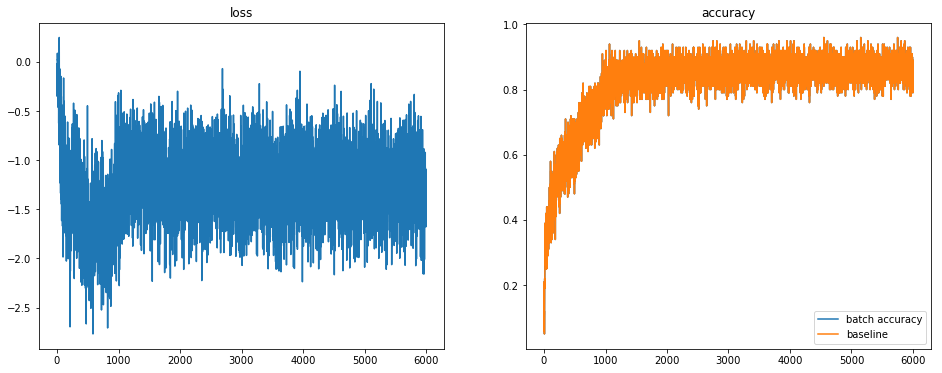

In [9]:
npstats = np.array(stats)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(npstats[:, 0])
plt.title('loss')

plt.subplot(1, 2, 2)
plt.plot(npstats[:, 1])
plt.plot(npstats[:, 2])
plt.legend(['batch accuracy', 'baseline'])
plt.title('accuracy')

In [10]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
print(np.mean(y_pred == y_test))

0.8751
